# Buffon Needle Experiment

#### Recall Buffon’s needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop n needles and N<sub>cross</sub> of them cross a line, then an estimate of $\pi$ is $\hat{\pi}$<sub>n</sub> = 2n/N<sub>cross</sub>.

#### For a range of values of n between 10 and 10,000, perform 30 replications of the Buffon needle experiment. For each value of n you test, plot the average of the 30 estimates of $\pi$ and a 95% confidence interval for the expected value of $\hat{\pi}$<sub>n</sub>. To clarify, you should only be making one plot, with n on the x-axis.

In [14]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/yujinhur/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Given by Professor Siddhartha Banerjee
def buffon(N,length,dist,seed=-1):
    # N = number of throws 
    # length = length of match
    # dist = distance between lines
    # seed = seed for random number generator
    
    # Visualize parallel vertical lines
    
    if seed==-1:
        xcent = np.random.uniform(0,dist/2.0,N) # random x-coordinate of center point
        theta = np.random.uniform(0,math.pi/2,N) # random angle
    else:
        np.random.seed(seed)
        xcent = np.random.uniform(0,dist/2.0,N) # random x-coordinate of center point
        theta = np.random.uniform(0,math.pi/2,N) # random angle

    xtip_l  = xcent - (length/2.0)*np.cos(theta) # generate left endpoint
    pihatN = 2.0*length*N/(dist*(sum(xtip_l < 0)))     
    return pihatN

In [4]:
sample_estimate = buffon(100,1,1)
print (sample_estimate)

3.50877192982


In [5]:
#### based of recitation
r = 30 # number of replications
avg_estimate = np.zeros(1000)
sd_estimate = np.zeros(1000)

In [16]:
mean = np.zeros(1000)
var = np.zeros(1000)

for j in range(1000):
    n = 10 + 10*j #range n from 10 to 10000 in increments of 10
    trial = np.zeros(r)
    
    for i in range(r):
        trial[i] = buffon(n,1,1)
        
    mean[j] = np.sum(trial)/30.
    var[j] = np.sum(trial**2)/30. - (mean[j])**2

#print (mean)

<Container object of 3 artists>

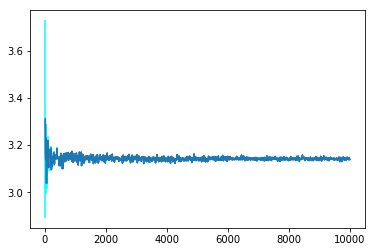

In [17]:
n_range = range(10,10010,10)
plt.plot(n_range, mean);
plt.errorbar(n_range, mean, yerr=scipy.stats.norm.ppf(0.975)*var/np.sqrt(r), ecolor = 'cyan')

# Silicon Wafer Machine

#### Consider a machine that produces silicon wafers. Each wafer produced is acceptable with probability P, and faulty with probability 1 − P, independent of all else. Unfortunately, P depends on things such as maintenance, personnel attentiveness, etc. that we cannot know with certainty, so we have decided to model P as a random variable that is uniformly distributed on (0.92, 0.96). The machine produces a single batch of 500 wafers each day and the factors that affect P are assumed to stay constant within the same day. As a result, we assume that each wafer in a single batch sees the same value of P, but different batches see different values of P.

#### Use simulation to compute the expected number of acceptable wafers in a batch of 500 wafers (call this m, say). Give a 95% confidence interval for m that is accurate to one decimal place, choosing the number of samples (i.e., number of days to simulate) appropriately.

Find number of days to simulate:

$$\frac{z_{0.025}\cdot s}{\sqrt{n}} \le 0.05$$

$$n \ge \Bigg(\frac{z_{0.025}\cdot s}{0.05} \Bigg)^2$$

In [21]:
#For 95% confidence interval
phi = sp.stats.norm.ppf(0.025)
batch_size = 500

# FIND NUMBER OF DAYS TO SIMULATE
trial_days = 1000
batch = np.random.rand(trial_days, batch_size)
prob = np.random.uniform(0.92, 0.96, trial_days)
num_acceptable = np.empty([trial_days,1])

for t in range(trial_days):
    num_acceptable[t] = np.sum((batch[t,:]<prob[t]) + 0)

s = np.std(num_acceptable, ddof=1) #sample variance
n = int((phi*s/0.05)**2) + 1 #number of days to simulate


# SIMULATE 
sim_days = n
batch = np.random.rand(sim_days, batch_size)
prob = np.random.uniform(0.92, 0.96, sim_days)
num_acceptable = np.empty([sim_days,1])

for d in range(sim_days):
    num_acceptable[d] = np.sum((batch[d,:]<prob[d]) + 0)

s = np.std(num_acceptable, ddof=1) # sample variance
mean = np.mean(num_acceptable) # sample mean
halfwidth = s*phi/np.sqrt(sim_days)

LB = mean + halfwidth #lowerbound
UB = mean - halfwidth #upperbound

print ("The 95% confidence interval for expected number of acceptable wafers in a batch of 500\
 wafers is " + str((LB,UB)) +" using " + str(sim_days) + " days of simulation.")

The 95% confidence interval for expected number of acceptable wafers in a batch of 500 wafers is (469.94929113902407, 470.05034344246423) using 93044 days of simulation.


#### Use the simulation to give a 95% confidence interval for the probability, q, that 475 or more of the 500 wafers in a batch are acceptable. Choose the number of samples appropriately so that your estimate of q is accurate to one decimal place.

In [22]:
#For 95% confidence interval
phi = sp.stats.norm.ppf(0.025)
batch_size = 500

trial_days = 1000
batch = np.random.rand(trial_days, batch_size)
prob = np.random.uniform(0.92, 0.96, trial_days)
p_acceptable = np.empty([trial_days,1])

for t in range(trial_days):
    p_acceptable[t] = (np.sum((batch[t,:]<prob[t]) + 0) >= 475) + 0

s = np.std(p_acceptable, ddof=1) #sample variance
n = int((phi*s/0.05)**2) + 1 #number of days to simulate

# SIMULATE 
sim_days = n
batch = np.random.rand(sim_days, batch_size)
prob = np.random.uniform(0.92, 0.96, sim_days)
p_acceptable = np.empty([sim_days,1])

for d in range(sim_days):
    p_acceptable[d] = (np.sum((batch[d,:]<prob[d]) + 0) >= 475) + 0 

#print np.sum(p_acceptable)
#print 475./500

    
s = np.std(p_acceptable, ddof=1) # sample variance
mean = np.mean(p_acceptable) # sample mean
halfwidth = s*phi/np.sqrt(sim_days) 

LB = mean + halfwidth #lowerbound
UB = mean - halfwidth #upperbound

print ("The 95% confidence interval for the probability, q, that 475 or more of the 500\
 wafers in a batch are acceptable is " + str((LB,UB)) +" using " + str(sim_days) + " days of simulation.")

The 95% confidence interval for the probability, q, that 475 or more of the 500 wafers in a batch are acceptable is (0.2504823769559521, 0.34951762304404788) using 330 days of simulation.


# Hotel Reservation

#### A hotel has 100 rooms. For simplicity, assume that people pay for hotel rooms in advance (as with hotels.com etc). The number of paid hotel rooms for tomorrow night is 104. (Hotels usually overbook.) Rooms are held until 10pm, but if a guest hasn’t shown up by 10pm, then the booking is cancelled, and the hotel keeps the booked guest’s money. The hotel has learned from past experience that the probability that any booked guest actually shows up by 10pm is p = 19/20, and that hotel guests show up (or not) independently from one another.


#### What is the probability that there will not be enough rooms for the booked guests who show up by 10pm? (No need to use simulation.)

In [24]:
import scipy.stats as ss

binomial = ss.binom(n,19./20)

# Probability of overbooking: P(X > 100)
POverbooked = 0 
for n in range(101,105):
    POverbooked += binomial.pmf(n)
print (POverbooked)

0.230795143163


#### Suppose that guests pay \$80 to reserve a room, of which the hotel earns \$50 in profit. However, if the hotel is overbooked, the hotel must pay a compensation of \$60 to each guest that is unable to stay at the hotel in addition to refunding the \$80 pre-booking fee. For example, if we accept no reservations, the expected profit is \$0. On the other hand, if we accept a very large number of reservations, we would expect to lose money since each guest who we have to turn away results in a loss of \$60 in profit. Suppose demand for pre-booked rooms is unlimited. What number of rooms should be sold to maximize the expected profit?

In [25]:
rooms = np.arange(100,500) 
num_rooms = len(rooms) 

num_trials = 1000 
val = np.empty([num_rooms, num_trials])

for n in range(num_trials):
    val[:,n] = sp.stats.binom.ppf(np.random.rand(), rooms, float(19)/20)

x = np.mean(val,1)

profit = 50*np.minimum(x,100)- 60*np.maximum(x-100,0)
print str(100+np.argmax(profit)) + ", " + str(np.amax(profit))

SyntaxError: invalid syntax (<ipython-input-25-4fc94248d54a>, line 13)